<a href="https://colab.research.google.com/github/Sielth/MusicRecommendationML/blob/main/mood_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install onnx
!pip install onnxruntime

In [ ]:
!pip install skl2onnx

In [ ]:
# Using RandomForestClassification and Emotion data set from Github

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataframe

mood_df = pd.read_csv('https://raw.githubusercontent.com/cristobalvch/Spotify-Machine-Learning/master/data/data_moods.csv')
mood_df.columns=['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key', 'time_signature', 'mood']

In [ ]:
# Show dataframe

mood_df

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,2020-06-19,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,2019-11-19,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,2020-04-17,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,2019-05-03,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad


In [ ]:
# Drop the features that would add noise to the training model

mood_df = mood_df.drop(columns=['id', 'release_date', 'length', 'album', 'artist', 'popularity', 'key', 'time_signature'])
mood_df

,name,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,mood
0,1999,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,Happy
1,23,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,Sad
2,9 Crimes,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,Sad
3,99 Luftballons,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,Happy
4,A Boy Brushed Red Living In Black And White,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,Energetic
...,...,...,...,...,...,...,...,...,...,...,...
681,windcatcher,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,Calm
682,yellow is the color of her eyes,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,Sad
683,you broke me first,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,Sad
684,you were good to me,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,Sad


In [ ]:
# Parse songName and mood to integers

from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()
mood_df["name"]=ord_enc.fit_transform(mood_df[["name"]])
mood_df["mood"]=ord_enc.fit_transform(mood_df[["mood"]])

In [ ]:
# Show dataframe

mood_df

,name,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,mood
0,0.0,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,2.0
1,1.0,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,3.0
2,2.0,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,3.0
3,3.0,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,2.0
4,4.0,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1.0
...,...,...,...,...,...,...,...,...,...,...,...
681,681.0,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0.0
682,682.0,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,3.0
683,683.0,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,3.0
684,684.0,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,3.0


In [ ]:
# Plotting pairwise relationship in the dataset

#sns.pairplot(mood_df)

In [ ]:
#sns.heatmap(mood_df.corr())

In [ ]:
from sklearn.model_selection import train_test_split

X=mood_df[['name', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence', 'loudness', 'speechiness', 'tempo']]  # Features
y=mood_df['mood']  # Labels

# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Select the algorithm to train the model: RandomForestClassifier

rfc=RandomForestClassifier(criterion='gini', min_samples_split=2, n_estimators=20)

In [ ]:
# Train the model

rfc.fit(X_train, y_train)

# Predict

y_pred=rfc.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        41
         1.0       0.71      0.83      0.77        36
         2.0       0.58      0.47      0.52        30
         3.0       0.81      0.71      0.76        31

    accuracy                           0.78       138
   macro avg       0.76      0.75      0.75       138
weighted avg       0.77      0.78      0.77       138

[[41  0  0  0]
 [ 0 30  6  0]
 [ 1 10 14  5]
 [ 3  2  4 22]]


Feature: 0, Score: 0.03326
Feature: 1, Score: 0.06262
Feature: 2, Score: 0.12821
Feature: 3, Score: 0.22388
Feature: 4, Score: 0.18406
Feature: 5, Score: 0.03523
Feature: 6, Score: 0.07209
Feature: 7, Score: 0.17908
Feature: 8, Score: 0.04407
Feature: 9, Score: 0.03750


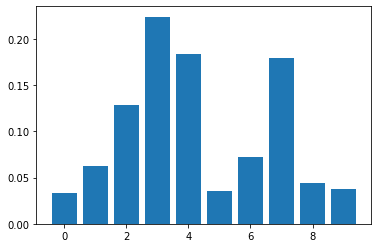

In [ ]:
# Get feature importance

importance = rfc.feature_importances_

# Summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# Plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# 'name' = 0.03 drop
# 'danceability' = 0.05
# 'acousticness' = 0.1 
# 'energy' = 0.1
# 'instrumentalness' = 0.2
# 'liveness' = 0.02 drop
# 'valence' = 0.07
# 'loudness' = 0.1
# 'speechiness' = 0.07
# 'tempo' = 0.03 drop

In [ ]:
mood_df = mood_df.drop(columns=['name', 'liveness', 'tempo'])
mood_df

,danceability,acousticness,energy,instrumentalness,valence,loudness,speechiness,mood
0,0.866,0.13700,0.7300,0.000000,0.6250,-8.201,0.0767,2.0
1,0.381,0.01890,0.8320,0.196000,0.1660,-5.069,0.0492,3.0
2,0.346,0.91300,0.1390,0.000077,0.1160,-15.326,0.0321,3.0
3,0.466,0.08900,0.4380,0.000006,0.5870,-12.858,0.0608,2.0
4,0.419,0.00171,0.9320,0.000000,0.4450,-3.604,0.1060,1.0
...,...,...,...,...,...,...,...,...
681,0.402,0.96100,0.2360,0.919000,0.1460,-20.615,0.0603,0.0
682,0.452,0.75700,0.5150,0.120000,0.1910,-7.351,0.0255,3.0
683,0.642,0.78600,0.3740,0.000000,0.0799,-9.386,0.0545,3.0
684,0.561,0.91300,0.0848,0.000026,0.2060,-15.099,0.0404,3.0


In [ ]:
X=mood_df[['danceability', 'acousticness', 'energy', 'instrumentalness', 'valence', 'loudness', 'speechiness']]  # Features
y=mood_df['mood']  # Labels

# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [ ]:
# Select the algorithm to train the model: RandomForestClassifier

rfc=RandomForestClassifier(criterion='gini', min_samples_split=2, n_estimators=20)

In [ ]:
# Train the model

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
# Predict

y_pred=rfc.predict(X_test)
print(y_pred)

[1. 1. 1. 0. 1. 2. 2. 1. 1. 3. 0. 0. 0. 2. 2. 1. 0. 2. 1. 3. 0. 1. 2. 3.
 3. 1. 3. 3. 2. 3. 3. 1. 3. 0. 0. 1. 0. 3. 1. 0. 3. 3. 1. 2. 3. 3. 1. 0.
 1. 0. 3. 1. 2. 2. 0. 0. 0. 1. 3. 1. 3. 1. 2. 2. 2. 1. 3. 2. 1. 2. 2. 1.
 0. 0. 3. 3. 2. 0. 1. 1. 1. 0. 1. 3. 3. 1. 3. 2. 3. 3. 2. 3. 3. 2. 2. 3.
 0. 0. 0. 2. 0. 2. 0. 0. 1. 1. 1. 0. 0. 0. 0. 2. 1. 2. 3. 3. 3. 0. 0. 0.
 2. 1. 1. 1. 3. 1. 2. 1. 3. 3. 1. 0. 1. 0. 3. 0. 3. 0.]


In [ ]:
# Find how accurate was the prediction

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        36
         1.0       0.79      0.82      0.81        38
         2.0       0.56      0.56      0.56        27
         3.0       0.86      0.84      0.85        37

    accuracy                           0.80       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.80      0.80      0.80       138

[[34  0  1  1]
 [ 0 31  7  0]
 [ 0  8 15  4]
 [ 2  0  4 31]]


In [ ]:
# Saving and Loading Stacked Ensemble Classifiers in ONNX Format in Python

In [ ]:
# To serialize (save) the model, we need to import convert_sklearn from the skl2onnx package, 
# along with common.data_types to define the types of our features as a parameter initial_types.

from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [ ]:
# The convert_sklearn function requires a parameter initial_types to save the model. 
# Each data type of the data columns must be assigned to this parameter. 

initial_types = [('feature_input', FloatTensorType([None, 7]))]

In [ ]:
# Saving the model

onx = convert_sklearn(rfc,
                      initial_types=
                      initial_types)

with open("model_mood.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [ ]:
# To make predictions from the model, import onnxruntime and call InferenceSession.

import onnxruntime as rt

sess = rt.InferenceSession("model_mood.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
pred_onx = sess.run([label_name], 
                 {input_name:
                   X_test.to_numpy(dtype='float32')})

In [ ]:
# # Predict from the saved model

print(pred_onx)

[array([0, 2, 3, 3, 2, 0, 1, 1, 0, 3, 3, 0, 0, 0, 0, 2, 0, 1, 2, 3, 2, 2,
       2, 0, 3, 3, 2, 2, 2, 0, 1, 1, 0, 3, 1, 0, 1, 0, 0, 1, 0, 1, 0, 3,
       3, 0, 3, 3, 0, 2, 3, 3, 2, 0, 2, 2, 0, 3, 3, 1, 3, 1, 2, 3, 0, 1,
       0, 0, 2, 3, 0, 2, 1, 2, 3, 3, 0, 1, 3, 2, 1, 1, 0, 3, 2, 0, 0, 1,
       3, 1, 0, 1, 1, 0, 0, 3, 3, 3, 0, 1, 3, 0, 0, 1, 2, 3, 3, 1, 1, 1,
       1, 3, 0, 2, 2, 0, 3, 1, 1, 1, 1, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3,
       0, 1, 3, 2, 0, 0], dtype=int64)]


In [ ]:
# Using K-Means Clustering algorithm and Emotion data set from Github to compare the two algorithms

In [ ]:
mood_df

,danceability,acousticness,energy,instrumentalness,valence,loudness,speechiness,mood
0,0.866,0.13700,0.7300,0.000000,0.6250,-8.201,0.0767,2.0
1,0.381,0.01890,0.8320,0.196000,0.1660,-5.069,0.0492,3.0
2,0.346,0.91300,0.1390,0.000077,0.1160,-15.326,0.0321,3.0
3,0.466,0.08900,0.4380,0.000006,0.5870,-12.858,0.0608,2.0
4,0.419,0.00171,0.9320,0.000000,0.4450,-3.604,0.1060,1.0
...,...,...,...,...,...,...,...,...
681,0.402,0.96100,0.2360,0.919000,0.1460,-20.615,0.0603,0.0
682,0.452,0.75700,0.5150,0.120000,0.1910,-7.351,0.0255,3.0
683,0.642,0.78600,0.3740,0.000000,0.0799,-9.386,0.0545,3.0
684,0.561,0.91300,0.0848,0.000026,0.2060,-15.099,0.0404,3.0


In [ ]:
# Choosing the features we want to use

x = mood_df.iloc[:, [1,2,3,4,5,6,7]]

# Substracting the values into an array table 

x = np.array(mood_df)

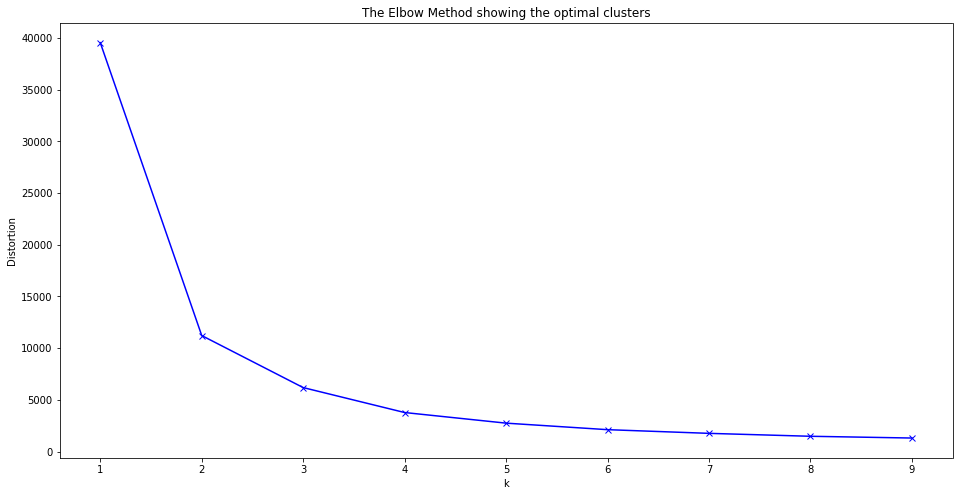

In [ ]:
# Before we implementing the k-means and assign the centers of our data, we can also make a quick analyze to find the optimal number (centers) of clusters using Elbow Method.

from sklearn.cluster import KMeans

# Collecting the distortions into list

distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(x)
 distortions.append(kmeanModel.inertia_) 
 
 # Plotting the distortions

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

In [ ]:
# Define the model

kmeans_model = KMeans(n_clusters=4, random_state=None)

# Fit into our dataset fit

kmeans_predict = kmeans_model.fit_predict(x)

print(kmeans_predict)

[1 0 2 1 0 3 2 1 0 0 0 1 2 0 2 3 0 0 1 0 1 0 0 0 0 1 0 3 3 1 1 2 0 0 0 0 0
 0 3 3 1 0 0 3 1 1 1 1 3 0 1 1 0 0 3 0 1 1 1 2 1 1 1 1 0 0 0 0 1 2 2 0 0 0
 3 0 0 1 0 2 0 0 1 0 3 1 2 0 0 0 0 0 3 0 3 3 0 2 1 1 0 1 2 1 0 2 0 0 2 0 0
 3 1 0 0 0 1 2 0 3 2 2 1 1 1 1 0 1 1 0 1 2 1 1 2 1 0 2 0 0 3 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 1 0 2 1 1 2 0 2 0 1 3 0 2 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1
 1 2 2 1 1 2 0 2 2 1 1 2 3 2 0 1 1 0 3 3 0 0 1 1 1 0 1 2 0 0 0 0 1 1 3 2 2
 3 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 2 1 0 1 2 1 1 2 0 1 0 1 1 0 0
 0 0 2 1 2 2 0 2 3 0 0 3 3 1 2 1 0 1 1 1 3 1 1 2 1 1 1 2 1 1 0 1 2 1 0 0 3
 3 1 0 1 1 0 1 1 0 0 2 1 0 1 0 0 2 0 1 0 2 1 0 0 1 1 1 1 1 1 1 1 2 1 0 1 1
 3 0 0 0 2 1 1 3 2 0 0 2 3 3 1 0 3 2 2 0 2 3 1 1 0 0 1 0 0 0 1 0 0 3 0 0 0
 2 3 0 3 0 0 0 1 1 1 3 2 0 0 1 3 2 1 0 0 0 0 0 2 1 2 0 1 0 0 0 0 3 0 0 0 3
 0 1 3 0 0 0 2 0 1 2 3 3 1 2 3 2 0 0 0 2 0 3 3 3 2 0 0 0 1 2 2 2 2 0 3 2 0
 3 1 0 0 2 2 0 0 1 1 1 1 0 0 0 2 3 0 0 1 1 0 0 2 0 0 1 0 1 3 2 0 0 2 0 0 2
 1 2 2 0 1 1 1 0 0 2 3 1 

In [ ]:
mood_df['Cluster'] = kmeans_predict
mood_df

,danceability,acousticness,energy,instrumentalness,valence,loudness,speechiness,mood,Cluster
0,0.866,0.13700,0.7300,0.000000,0.6250,-8.201,0.0767,2.0,1
1,0.381,0.01890,0.8320,0.196000,0.1660,-5.069,0.0492,3.0,0
2,0.346,0.91300,0.1390,0.000077,0.1160,-15.326,0.0321,3.0,2
3,0.466,0.08900,0.4380,0.000006,0.5870,-12.858,0.0608,2.0,1
4,0.419,0.00171,0.9320,0.000000,0.4450,-3.604,0.1060,1.0,0
...,...,...,...,...,...,...,...,...,...
681,0.402,0.96100,0.2360,0.919000,0.1460,-20.615,0.0603,0.0,2
682,0.452,0.75700,0.5150,0.120000,0.1910,-7.351,0.0255,3.0,0
683,0.642,0.78600,0.3740,0.000000,0.0799,-9.386,0.0545,3.0,1
684,0.561,0.91300,0.0848,0.000026,0.2060,-15.099,0.0404,3.0,2


In [ ]:
# Load original dataframe

original = pd.read_csv('https://raw.githubusercontent.com/cristobalvch/Spotify-Machine-Learning/master/data/data_moods.csv')
original.columns=['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'length', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence', 'loudness', 'speechiness', 'tempo', 'key', 'time_signature', 'mood']

In [ ]:
original[original.mood == "Happy"]

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.137000,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.089000,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
7,A Little Less Conversation - JXL Radio Edit Remix,Elvis 75 - Good Rockin' Tonight,Elvis Presley,4l2hnfUx0esSbITQa7iJt0,2009-12-28,1,211173,0.586,0.000155,0.935,0.277000,0.1590,0.580,-9.386,0.0482,114.997,4,4,Happy
14,Africa,Toto IV,TOTO,2374M0fQpWi3dLnB54qaLX,1982-04-08,84,295893,0.671,0.257000,0.373,0.000080,0.0481,0.732,-18.064,0.0323,92.717,9,4,Happy
25,All or Nothing (feat. Axel Ehnström) - Deluxe Mix,Less is More (Deluxe),Lost Frequencies,15bAMg00o4VdWmQrlkbfG3,2017-07-14,22,170458,0.737,0.226000,0.816,0.453000,0.6210,0.533,-9.220,0.0411,124.014,4,4,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,Wonderwall,(What's the Story) Morning Glory?,Oasis,79RUMZfMNMpqZnswovvTqv,1995-10-02,15,258906,0.412,0.002140,0.844,0.000000,0.1340,0.459,-5.613,0.0370,174.452,2,4,Happy
656,Worlds Collide - Edison Cole Remix,Worlds Collide (Remixes),NERVO,3JqpIjrQfmW68YkpxXWPL4,2019-11-22,55,192413,0.631,0.014900,0.862,0.000062,0.1030,0.438,-4.114,0.0515,145.010,8,4,Happy
661,You Can't Rely on My Love,You Can't Rely on My Love,Mordkey,6Nl2wvFyKjiyPKrhE4Rth1,2018-05-04,52,188571,0.686,0.053400,0.775,0.000009,0.4400,0.454,-7.247,0.1850,126.013,11,4,Happy
662,You Get What You Give,Maybe You've Been Brainwashed Too,New Radicals,32lF1rsInDTdK6Av3KdfaY,1998-01-01,1,300773,0.621,0.170000,0.901,0.000000,0.0875,0.744,-5.396,0.0302,113.967,2,4,Happy


In [ ]:
mood_df[mood_df.Cluster == 2]

,danceability,acousticness,energy,instrumentalness,valence,loudness,speechiness,mood,Cluster
2,0.346,0.913,0.1390,0.000077,0.1160,-15.326,0.0321,3.0,2
6,0.504,0.994,0.0584,0.956000,0.5530,-20.461,0.0516,0.0,2
12,0.382,0.497,0.3330,0.918000,0.0486,-15.573,0.0367,0.0,2
14,0.671,0.257,0.3730,0.000080,0.7320,-18.064,0.0323,2.0,2
31,0.693,0.894,0.1950,0.032500,0.3150,-15.278,0.0446,3.0,2
...,...,...,...,...,...,...,...,...,...
670,0.235,0.926,0.2330,0.890000,0.1640,-21.173,0.0712,0.0,2
675,0.609,0.985,0.1570,0.792000,0.0698,-15.792,0.0322,0.0,2
678,0.259,0.956,0.2590,0.942000,0.0403,-18.890,0.0594,0.0,2
681,0.402,0.961,0.2360,0.919000,0.1460,-20.615,0.0603,0.0,2


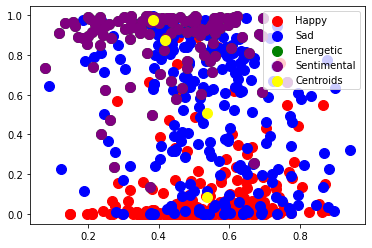

In [ ]:
# Visualising the clusters

plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Happy')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Sad')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'Energetic')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = 'purple', label = 'Sentimental')


# Plotting the centroids of the clusters

plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [ ]:
# Conclusion: unsupervised learning bad